# Physique : DM + Filtrage : Exercice 2

- author : Sylvie Dagoret-Campagne
- afflilation : LAL/IJCLab, CNRS
- creation date : January 12th 2020
- update : 
    - Janurary 13th 2020
 

In [1]:
import os
import re
import numpy as np

In [2]:
import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8') # vary depending on your lang/locale

'en_US.UTF-8'

In [3]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.colors as colors
import matplotlib.cm as cmx

In [4]:
import numpy as np
import re
import time
from datetime import datetime,date
import dateutil.parser
import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy.coordinates import Angle
from astropy import units as u

In [5]:
from math import ceil,floor
from astropy.io import fits
from astropy.table import Table
from astropy.time import Time
import astropy
from astropy.visualization.mpl_normalize import (ImageNormalize,MinMaxInterval,PercentileInterval,SqrtStretch,LogStretch)
from astropy.visualization.wcsaxes import SphericalCircle

In [6]:
from scipy import signal

In [7]:
matplotlib.rcParams.update({'font.size': 15, 'lines.linewidth': 2, 'lines.markersize': 15})
matplotlib.rcParams["axes.labelsize"]="small"
matplotlib.rcParams["axes.linewidth"]=2.0
matplotlib.rcParams["xtick.major.size"]=8
matplotlib.rcParams["ytick.major.size"]=8
matplotlib.rcParams["ytick.minor.size"]=5
matplotlib.rcParams["xtick.labelsize"]="large"
matplotlib.rcParams["ytick.labelsize"]="large"
matplotlib.rcParams["figure.figsize"]=(8,8)
matplotlib.rcParams['axes.titlesize'] = 15
matplotlib.rcParams['axes.titleweight'] = 'bold'
#matplotlib.rcParams['axes.facecolor'] = 'blue'
matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'
matplotlib.rcParams['lines.markeredgewidth'] = 0.3 # the line width around the marker symbol
matplotlib.rcParams['lines.markersize'] = 10  # markersize, in points
matplotlib.rcParams['grid.alpha'] = 1. # transparency, between 0.0 and 1.0
matplotlib.rcParams['grid.linestyle'] = '-' # simple line
matplotlib.rcParams['grid.linewidth'] = 0.4 # in points 

# Start

In [8]:
today = date.today()
string_date=today.strftime("%Y-%m-%d")

# définition

## Constantes

In [9]:
H0 = 1.0
Q  = 1./4.

## Fonctions de transfert

$$
H(x) = \frac{H_0}{1 +j \frac{x}{Q(1-x^2)}}
$$

In [10]:
def H(x):
    y= H0/(1 + (x*(1j/Q)/(1-x**2)))
    return y

## Gain

$$
G(x) = \frac{H_0}{ \sqrt{1 + ( \frac{x}{Q(1-x^2)} )^2}}
$$

In [11]:
def Mod(x):
    return np.abs(H(x))

## Phase

$$
Arg(x) = - \arctan \left( \frac{x/Q}{(1-x^2)} \right)
$$

In [12]:
def Arg(x):
    
    realpart = np.real(H(x))
    imagpart = np.imag(H(x))
    
    #angle = np.where(realpart > 0, np.angle(H(x)),  np.angle(H(x)) )
    
    angle = np.angle(H(x))
    
    return angle

# Vecteurs des X

In [13]:
X = np.logspace(-3,3,500,base=10)

In [14]:
G = Mod(X)

In [15]:
Phi= Arg(X)*180./np.pi

# Plot

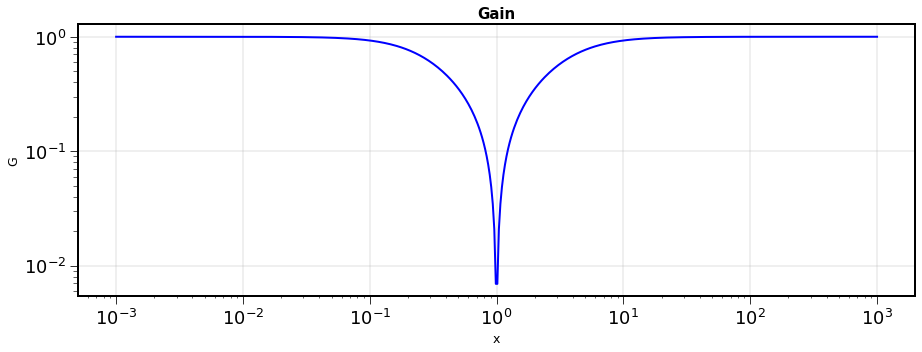

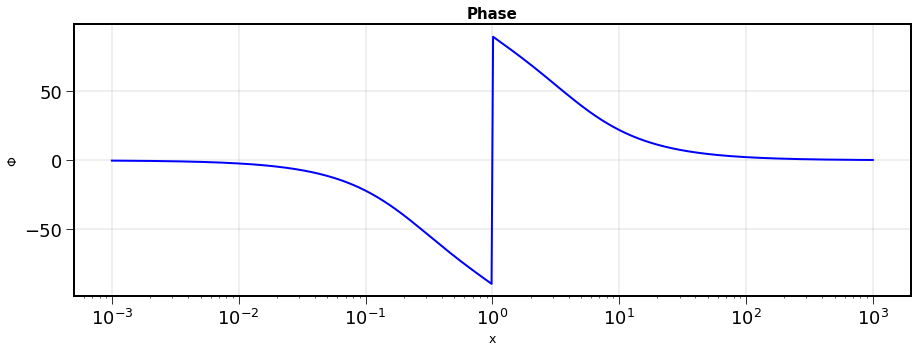

In [16]:
# Gain
plt.figure(figsize=(15,5))
plt.loglog(X,G,"b-")
plt.grid()
plt.xlabel("x")
plt.ylabel("G")
plt.title("Gain")
plt.show()

# Phase
plt.figure(figsize=(15,5))
plt.semilogx(X,Phi,"b-")
plt.grid()
plt.xlabel("x")
plt.ylabel("$\\Phi$")
plt.title("Phase")
plt.show()

# Vérification avec signal de la librarie scipy 

In [17]:
#signal.lti?

In [18]:
# on fournit le numérateur et dénominateur de la fonction de transfert (en coefficient de la transformée de Laplace)
s1 = signal.lti([H0, 0 ,H0], [1, 1./Q,  1])
w, mag, phase = signal.bode(s1,w=X)

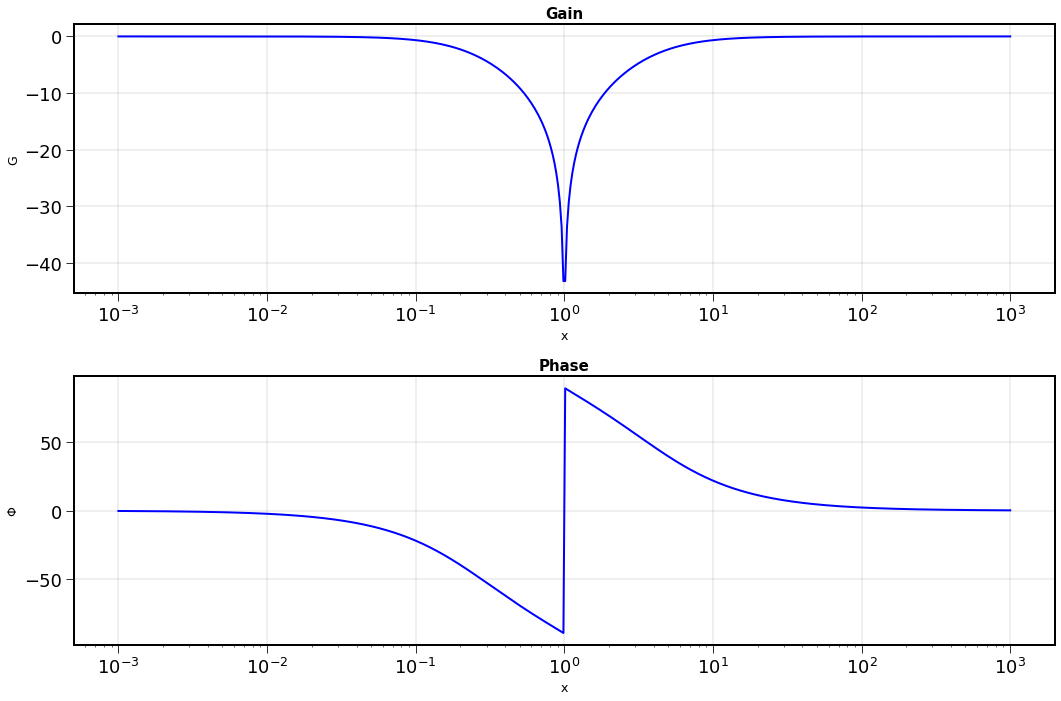

In [19]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.semilogx(w, mag,"b")    # Bode magnitude plot
plt.grid()
plt.xlabel("x")
plt.ylabel("G")
plt.title("Gain")


plt.subplot(2,1,2)
plt.semilogx(w, phase,"b")  # Bode phase plot
plt.grid()
plt.xlabel("x")
plt.ylabel("$\\Phi$")
plt.title("Phase")

plt.tight_layout()
plt.show()